<a href="https://colab.research.google.com/github/b-richins92/Cancer_Prediction/blob/main/pycaret.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pycaret


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.1/486.1 kB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 kB 16.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 38.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.5/160.5 kB 14.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.3/258.3 kB 20.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 9.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.7/80.7 kB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.8/21.8 MB 36.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 4.7

In [2]:
import pycaret
pycaret.__version__

'3.3.2'

In [3]:

import pandas as pd
import numpy as np
#from pycaret.util import version

In [15]:
import os
import requests
from zipfile import ZipFile
from urllib.request import urlretrieve
import pandas as pd
import numpy as np
import altair as alt
from vega_datasets import data
%matplotlib inline
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import statsmodels.api as sm
from sklearn.feature_selection import RFECV
from sklearn.ensemble import RandomForestClassifier
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from imblearn.over_sampling import SMOTE
from sklearn.metrics import recall_score, precision_score, accuracy_score, f1_score

In [4]:
df = pd.read_csv('copy_output.csv')
df.head()
df.shape

(131956, 63)

In [ ]:
df.isnull().sum()

In [20]:
data = pd.read_csv('clean_df.csv')
data.columns

Index(['Gender', 'Num of Bad Mental Health Days', 'Could Afford Doctor',
       'Years Since Last Checkup', 'Exercise in Past 30 Days',
       'Hours of Sleeping', 'Heart Attack', 'Heart Disease', 'Stroke',
       'Asthma', 'Cancer', 'Depression', 'Kidney Disease', 'Arthritis',
       'Diabetes', 'Married', 'Deaf', 'Blind', 'Mammogram', 'Smoked 100',
       'Smokeless Tobacco', 'Cigarettes per Day', 'CT Scan', 'CT for Cancer',
       'Drinks per Session', 'Flu Vaccine', 'Pneumonia Vaccine',
       'Tetanus Last 10 Years', 'Had COVID', 'Metropolitan',
       'Weight in Pounds', 'Height in Inches', 'Insulin',
       'General Health_Excellent', 'General Health_Fair',
       'General Health_Good', 'General Health_Poor',
       'General Health_Very good',
       'Ethnicity_American Indian and Alaskan Native',
       'Ethnicity_Asian and Pacific Islander', 'Ethnicity_Black',
       'Ethnicity_Hispanic', 'Ethnicity_Multiracial, non-Hispanic',
       'Ethnicity_White', 'Education_attended_coll

In [21]:
data.drop(['General Health_Excellent', 'General Health_Fair',
       'General Health_Good', 'General Health_Poor',
       'General Health_Very good'], axis=1)

,Gender,Num of Bad Mental Health Days,Could Afford Doctor,Years Since Last Checkup,Exercise in Past 30 Days,Hours of Sleeping,Heart Attack,Heart Disease,Stroke,Asthma,...,"Ethnicity_Multiracial, non-Hispanic",Ethnicity_White,Education_attended_college,Education_did_not_graduate_high_school,Education_graduated_college,Education_graduated_high_school,BMI Category_normal_weight,BMI Category_obese,BMI Category_over_weight,BMI Category_underweight
0,0,0.0,0.0,1.0,1.0,7.0,0.0,0.0,0.0,1.0,...,False,True,False,False,False,True,True,False,False,False
1,0,0.0,0.0,1.0,1.0,9.0,0.0,0.0,0.0,0.0,...,False,True,True,False,False,False,True,False,False,False
2,0,0.0,0.0,1.0,1.0,7.0,0.0,0.0,0.0,0.0,...,False,False,False,False,True,False,True,False,False,False
3,0,0.0,0.0,1.0,0.0,8.0,0.0,0.0,0.0,0.0,...,False,True,False,False,False,True,False,False,True,False
4,0,0.0,0.0,1.0,0.0,6.0,0.0,0.0,0.0,0.0,...,False,True,False,False,True,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219059,1,30.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,1.0,...,False,True,False,False,True,False,False,True,False,False
219060,1,3.0,0.0,3.0,0.0,7.0,0.0,0.0,0.0,0.0,...,False,True,False,False,False,True,True,False,False,False
219061,1,0.0,0.0,3.0,1.0,6.0,0.0,0.0,0.0,0.0,...,False,True,False,False,True,False,True,False,False,False
219062,0,0.0,0.0,1.0,1.0,8.0,0.0,0.0,0.0,1.0,...,False,True,True,False,False,False,True,False,False,False


In [8]:
from pycaret.classification import *
s = setup(data, target= 'Cancer', session_id = 123)


,Description,Value
0,Session id,123
1,Target,Cancer
2,Target type,Binary
3,Original data shape,"(219064, 52)"
4,Transformed data shape,"(219064, 52)"
5,Transformed train set shape,"(153344, 52)"
6,Transformed test set shape,"(65720, 52)"
7,Numeric features,32
8,Preprocess,True
9,Imputation type,simple


In [9]:
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.8863,0.7731,0.0268,0.5607,0.0512,0.0412,0.1039,11.8870
gbc,Gradient Boosting Classifier,0.8861,0.7710,0.0214,0.5512,0.0413,0.0330,0.0916,27.8200
ridge,Ridge Classifier,0.8857,0.7657,0.0021,0.6120,0.0042,0.0034,0.0303,0.7090
dummy,Dummy Classifier,0.8856,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.3330
lr,Logistic Regression,0.8855,0.7671,0.0285,0.4919,0.0539,0.0419,0.0969,29.3110
xgboost,Extreme Gradient Boosting,0.8854,0.7664,0.0452,0.4884,0.0827,0.0646,0.1215,4.2420
rf,Random Forest Classifier,0.8850,0.7414,0.0250,0.4501,0.0473,0.0357,0.0843,26.9410
ada,Ada Boost Classifier,0.8847,0.7655,0.0328,0.4463,0.0611,0.0462,0.0960,6.0780
lda,Linear Discriminant Analysis,0.8817,0.7657,0.0932,0.4225,0.1527,0.1161,0.1557,0.8230
et,Extra Trees Classifier,0.8797,0.7245,0.0553,0.3403,0.0951,0.0652,0.0976,33.7870


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [10]:
print(best)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=123, reg_alpha=0.0, reg_lambda=0.0, subsample=1.0,
               subsample_for_bin=200000, subsample_freq=0)


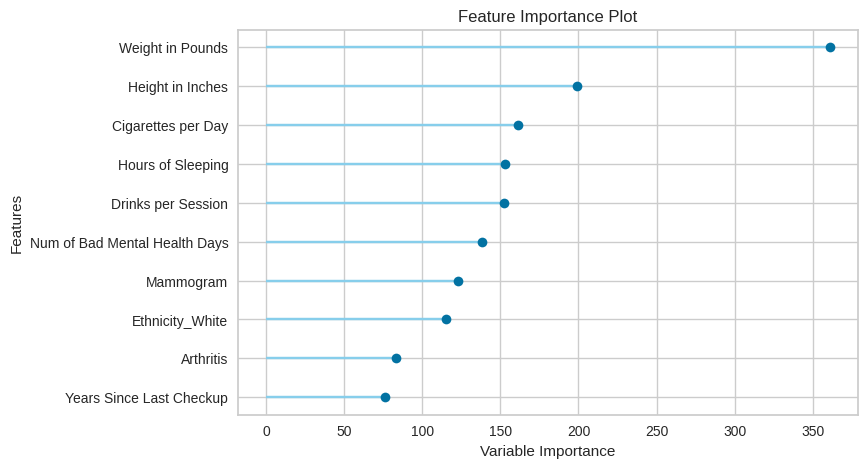

In [11]:
plot_model(best, plot='feature')

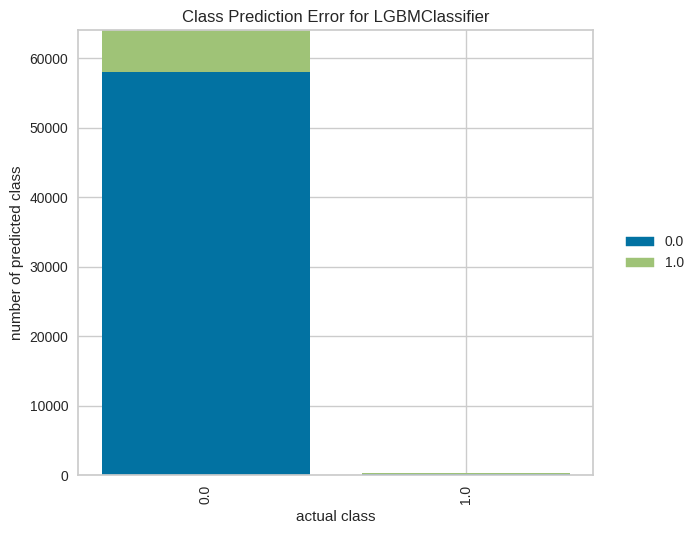

In [12]:
plot_model(best, plot= 'error')

In [ ]:
#plot_model(best, plot= 'residual')

In [27]:
prd = predict_model(best)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,0.1815,0.0904,0.3007,0.1053,0.2107,0.7924


In [28]:
prd.head(10)

,Gender,Num of Bad Mental Health Days,Could Afford Doctor,Years Since Last Checkup,Exercise in Past 30 Days,Hours of Sleeping,Heart Attack,Heart Disease,Stroke,Asthma,...,Education_attended_college,Education_did_not_graduate_high_school,Education_graduated_college,Education_graduated_high_school,BMI Category_normal_weight,BMI Category_obese,BMI Category_over_weight,BMI Category_underweight,Cancer,prediction_label
16432,0,0.0,0.0,1.0,1.0,6.0,1.0,0.0,0.0,1.0,...,True,False,False,False,False,False,True,False,1.0,0.269699
109150,0,20.0,0.0,2.0,1.0,7.0,0.0,0.0,0.0,0.0,...,False,False,True,False,False,False,True,False,0.0,0.001242
1800,1,0.0,0.0,1.0,1.0,7.0,0.0,0.0,1.0,0.0,...,False,False,True,False,False,True,False,False,0.0,0.277847
26315,0,0.0,0.0,1.0,0.0,8.0,0.0,0.0,0.0,0.0,...,False,False,True,False,True,False,False,False,0.0,0.024047
203164,0,0.0,0.0,1.0,1.0,6.0,0.0,0.0,0.0,0.0,...,False,False,True,False,False,False,True,False,0.0,0.191700
41372,0,0.0,0.0,1.0,0.0,6.0,0.0,0.0,0.0,1.0,...,False,False,False,True,False,True,False,False,0.0,0.025843
176673,0,0.0,0.0,1.0,1.0,6.0,0.0,0.0,0.0,0.0,...,True,False,False,False,False,False,True,False,0.0,0.023863
41405,1,0.0,0.0,1.0,1.0,9.0,0.0,0.0,0.0,0.0,...,True,False,False,False,False,False,True,False,1.0,0.276422
64210,1,0.0,0.0,1.0,1.0,8.0,0.0,0.0,0.0,0.0,...,False,False,False,True,False,False,True,False,0.0,0.016521
202853,1,2.0,0.0,1.0,1.0,7.0,0.0,0.0,0.0,0.0,...,False,False,True,False,True,False,False,False,0.0,0.046959


In [38]:
models()

,Name,Reference,Turbo
ID,,,
lr,Linear Regression,sklearn.linear_model._base.LinearRegression,True
lasso,Lasso Regression,sklearn.linear_model._coordinate_descent.Lasso,True
ridge,Ridge Regression,sklearn.linear_model._ridge.Ridge,True
en,Elastic Net,sklearn.linear_model._coordinate_descent.Elast...,True
lar,Least Angle Regression,sklearn.linear_model._least_angle.Lars,True
llar,Lasso Least Angle Regression,sklearn.linear_model._least_angle.LassoLars,True
omp,Orthogonal Matching Pursuit,sklearn.linear_model._omp.OrthogonalMatchingPu...,True
br,Bayesian Ridge,sklearn.linear_model._bayes.BayesianRidge,True
ard,Automatic Relevance Determination,sklearn.linear_model._bayes.ARDRegression,False
